In [1]:
import numpy as np
import matplotlib.pyplot as plt

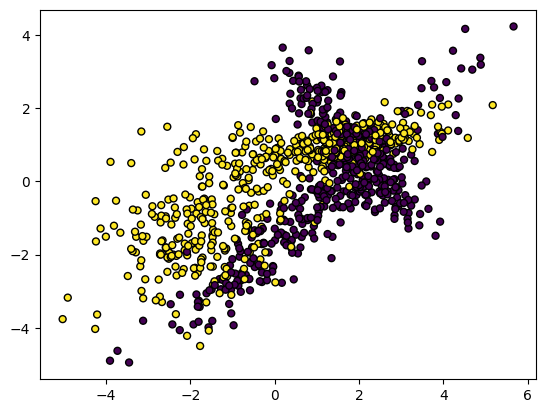

In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=7, n_redundant=1, n_informative=4,
                           n_clusters_per_class=2, random_state=42)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, marker='o', s=25, edgecolor='k')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)

X_train.shape, X_test.shape

((700, 8), (300, 8))

In [71]:
class Newton_Raphson:
    def __init__(self):
        self.l_rate = 0.01

    
    def fit(self, X, y, epochs):
        self.w = np.zeros(X.shape[1])

        loss_vals = []

        self.batch_size = int(0.1 * X.shape[0])
        for epoch in range(epochs):
            idx = np.random.randint(0, X.shape[0])
            if idx + self.batch_size > X.shape[0]:
                idx -= self.batch_size
            X_sample = X[idx:idx+self.batch_size]
            y_sample = y[idx:idx+self.batch_size]
            loss, first, second = self.newton_curve(X_sample, y_sample)
            loss_vals.append(loss)
            if epoch % 500 == 0:
                print(f"Loss function value at {epoch}: {loss}")
            
            H_inverse = np.linalg.pinv(second)
            self.w = self.w - self.l_rate * H_inverse @ first

        return self.w, epoch, loss_vals

    def newton_curve(self, X, y):
        m = X.shape[0]
        h = Newton_Raphson.h_theta(X, self.w)
        error = h - y
        cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)))
        first_der = (1/m) * np.dot(X.T, error)
        second_der = X.T @ np.diag((h) * (1 - h)) @ X
        return cost, first_der, second_der

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def h_theta(X, w):
        return Newton_Raphson.sigmoid(X @ w)
    
    @staticmethod
    def output(yhat):
        return np.round(yhat)

In [72]:
lr = Newton_Raphson()
W, epoch, losses = lr.fit(X_train, y_train, epochs=5000)

Loss function value at 0: -48.52030263919618
Loss function value at 500: -47.79790857075825
Loss function value at 1000: -47.03042152548344
Loss function value at 1500: -45.88453984510578
Loss function value at 2000: -46.23647725776534
Loss function value at 2500: -44.91764244621262
Loss function value at 3000: -45.13789378862504
Loss function value at 3500: -42.6917715439251
Loss function value at 4000: -44.4977617140134
Loss function value at 4500: -43.51305320015066


In [68]:
from sklearn.metrics import accuracy_score
yhat = Newton_Raphson.output(Newton_Raphson.h_theta(X_test, W))
accuracy_score(y_test, yhat)

0.6933333333333334

<Axes: >

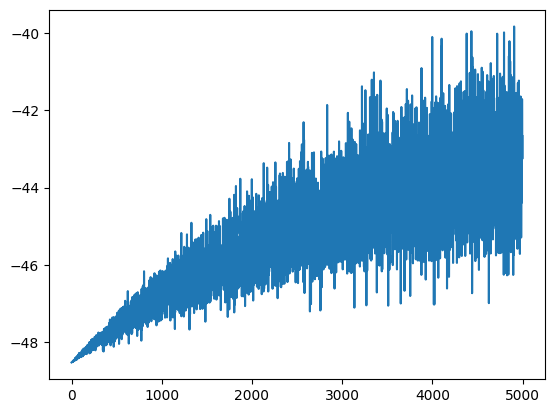

In [73]:
import seaborn as sns

sns.lineplot(losses)